# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Read the data
path = "/content/drive/MyDrive/Project #1- FoodHub/foodhub_order.csv"
df = pd.read_csv(path) ## Fill the blank to read the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

OBSERVATIONS: There are 1898 rows and 9 columns present in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


OBSERVATIONS: The datatypes of the different columns in the dataset are:float64(1), int64(4), object(4).



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [ ]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

OBSERVATIONS: There are 0 missing values in the dataset therefore no treatment is required.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Get the summary statistics of the numerical data
df.describe(include= "all").T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


OBSERVATIONS: Minimum = 20 mins, Average = 27.37 mins, Max = 35 mins.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts() ## Complete the code

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

OBSERVATIONS: There were 736 orders that were "Not given" leaving 1162 orders that have received a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

OBSERVATIONS: There are 1898 unique order IDs.



#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

OBSERVATIONS: There are 1200 unique customer IDs.

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

OBSERVATIONS: There are 178 unique restaurant names.

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

OBSERVATIONS: There are 14 unique cuisine types.

<Axes: xlabel='cuisine_type', ylabel='count'>

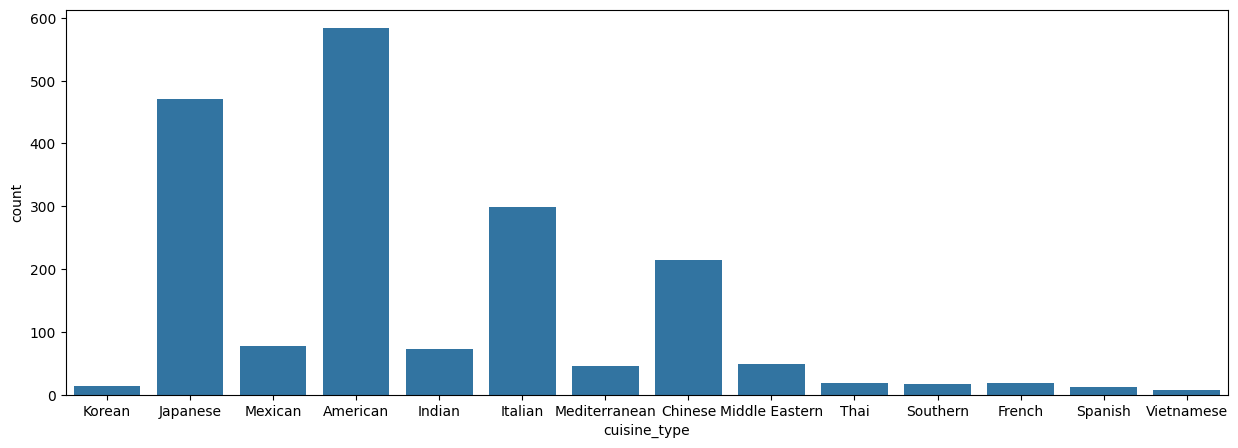

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

OBSERVATIONS: The following 6 cuisine types are the most commonly placed orders:

1.   American
2.   Japanese
3. Chinese
4. Italian
5. Mexican
6. Indian

#### Cost of the order

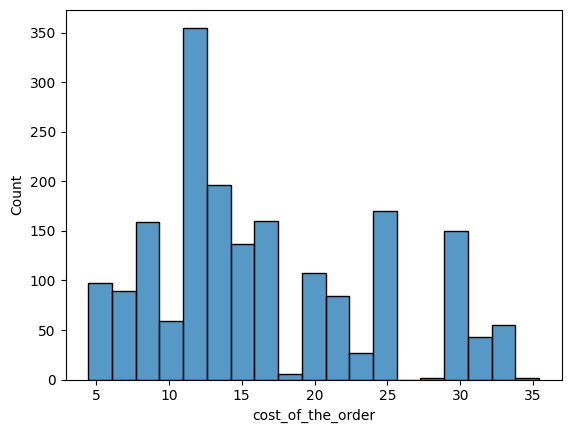

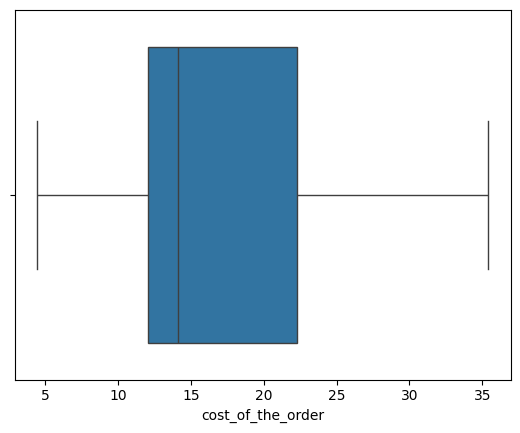

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

OBSERVATIONS: 50% of the food orders cost between 11 and 22.50. Around 550 total of those (~350 + ~200) orders cost between $11-13; a total of around 550 orders fall in this price range.

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

OBSERVATIONS: There are only two unique values for "day_of_the_week" column; "Weekend" and "Weekday".

<Axes: xlabel='day_of_the_week', ylabel='count'>

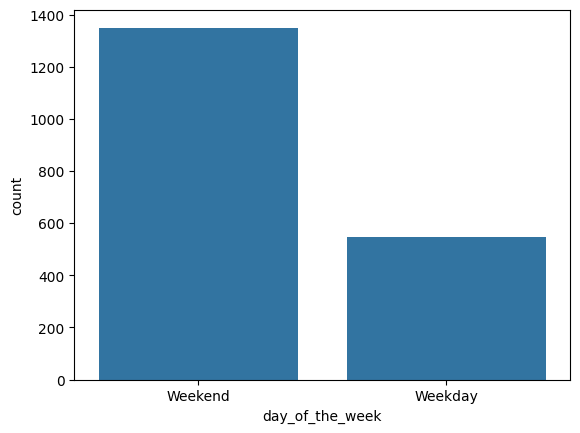

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [ ]:
# Check the unique values
df['rating'].nunique() ## Complete the code to check unique values for the 'rating' column

4

OBSERVATIONS: There are 4 unique values for the "rating" column.

<Axes: xlabel='rating', ylabel='count'>

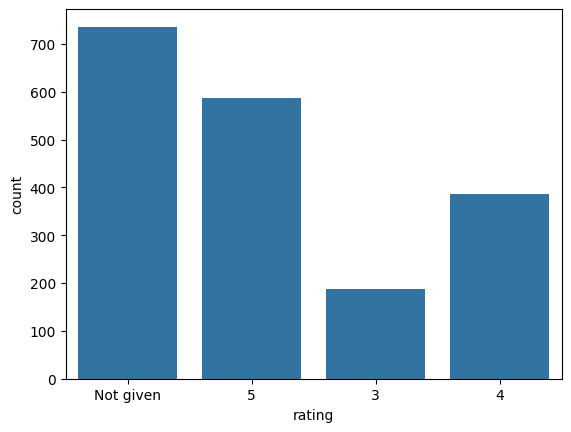

In [ ]:
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

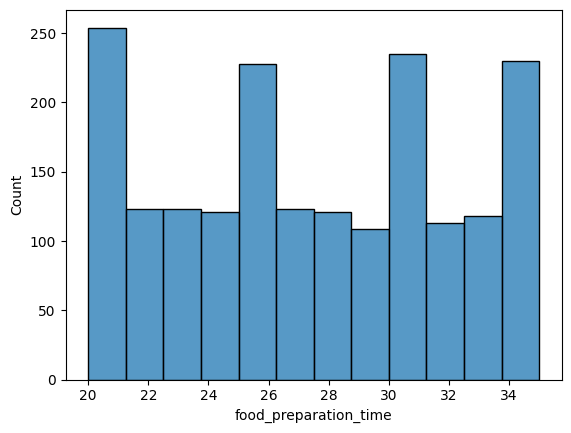

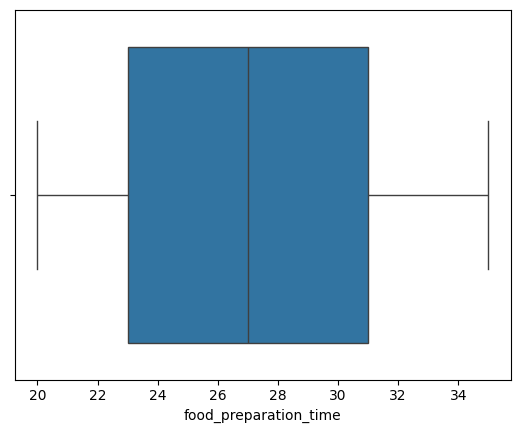

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

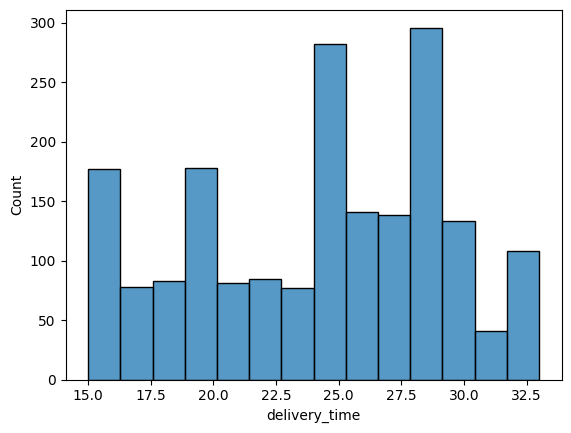

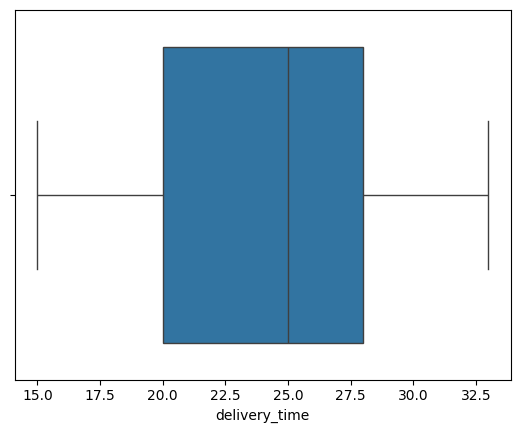

In [ ]:
sns.histplot(data=df,x='delivery_time') ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts() ## Complete the code

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

OBSERVATIONS: Shake Shack is the top restaurant with 219 orders and Parm is the lowest of the top 5 restaurants with 68 orders.

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].nunique() ## Complete the code to check unique values for the cuisine type on weekend

14

In [ ]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

OBSERVATIONS: The most popular cuisine on both weekdays and weekends is American food.

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


OBSERVATIONS: The percentage of orders that cost more than $20 is 29.24%.

### **Question 10:** What is the mean order delivery time? [1 mark]

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')


The mean delivery time for this dataset is 24.16 minutes


OBSERVATIONS: The mean order delivery time is 24.16 minutes or 24 minutes rounded to the nearest minute.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

Observations: The top three customer IDs and the number of their orders placed are below:


1.   Customer 52832 - 13 orders
2.   Customer 47440 - 10 orders
3.   Customer 83287 - 9 orders

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

#### Cuisine vs Cost of the order

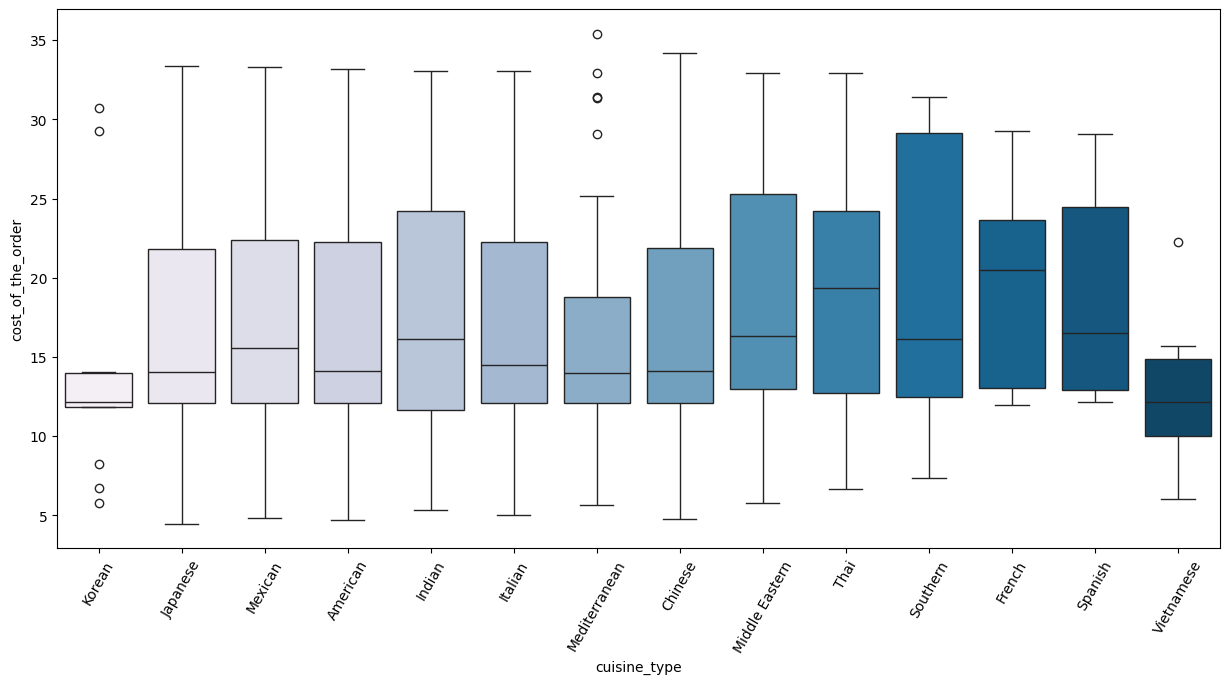

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

OBSERVATIONS: Although Mediterranean food does have some orders whose costs are outliers on the higher side, Southern food has the highest range of cost. And although Korean food does have some orders whose costs are outliers on the lower side, Vietnamese food has the lowest range of cost.

#### Cuisine vs Food Preparation time

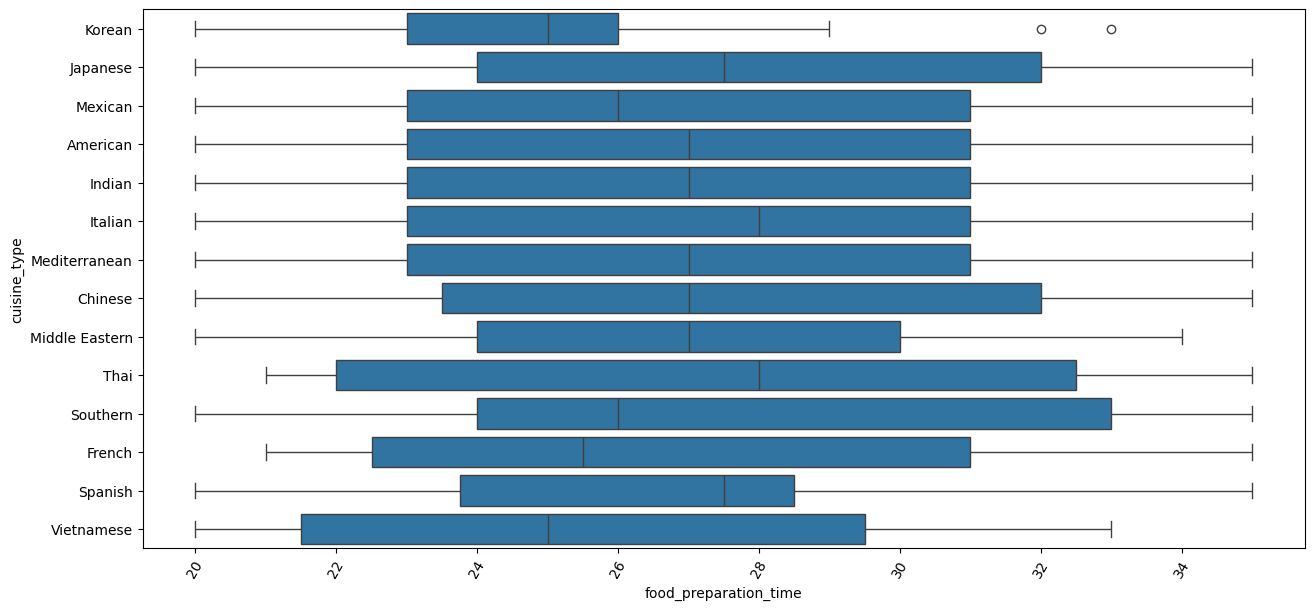

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x= 'food_preparation_time', y= 'cuisine_type')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

OBSERVATIONS: Although Korean cuisine does have some orders whose preparation times are outliers on the longer side, Southern cuisine has the highest order preparation time, followed closely by Thai cuisine. Vietnamese cuisine has orders with the shortest preparation time followed closely by Thai cuisine. This graph shows that Thai food has the greatest span between minimum and maximum order preparation times.

#### Day of the Week vs Delivery time

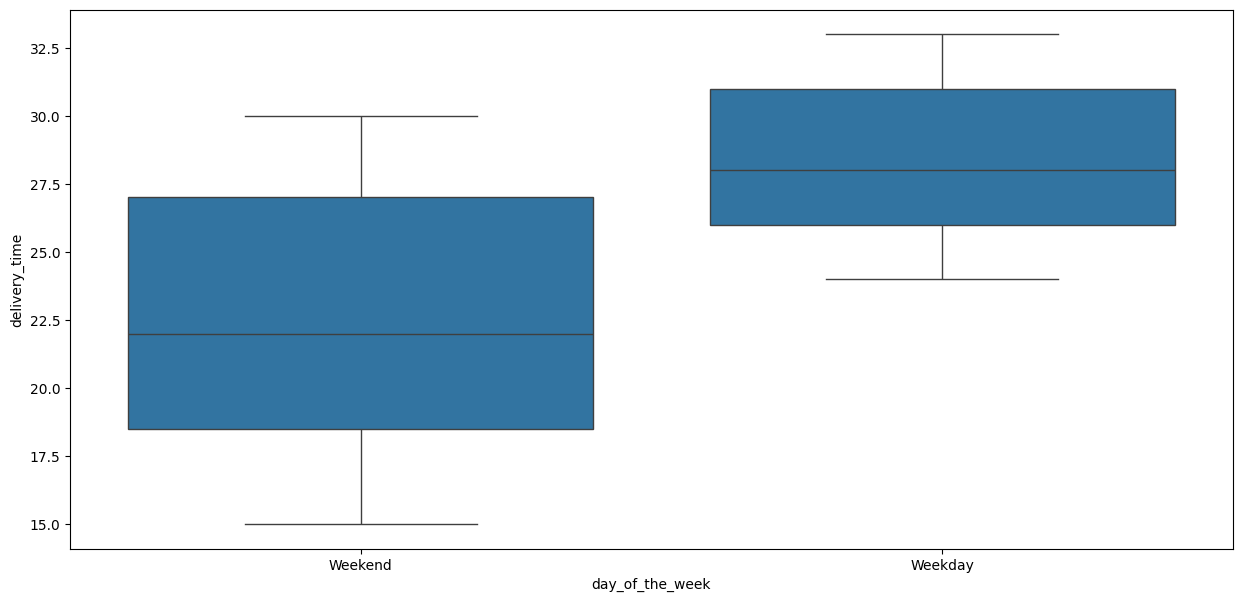

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x= 'day_of_the_week', y= 'delivery_time')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

OBSERVATIONS: Weekend days have a shorter delivery time on average between 15 to 30 minutes with 50% of orders arriving within around 18.5 to around 27 minutes. Weekday delivery times range between around 24 minutes to around 33 minutes with 50% of orders arriving within around 26 to around 31 minutes.  

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

OBSERVATIONS: The top 5 restaurants in terms of orders received are also the same restaurants in terms of revenue generated and follow the same sequential  order.

#### Rating vs Delivery time

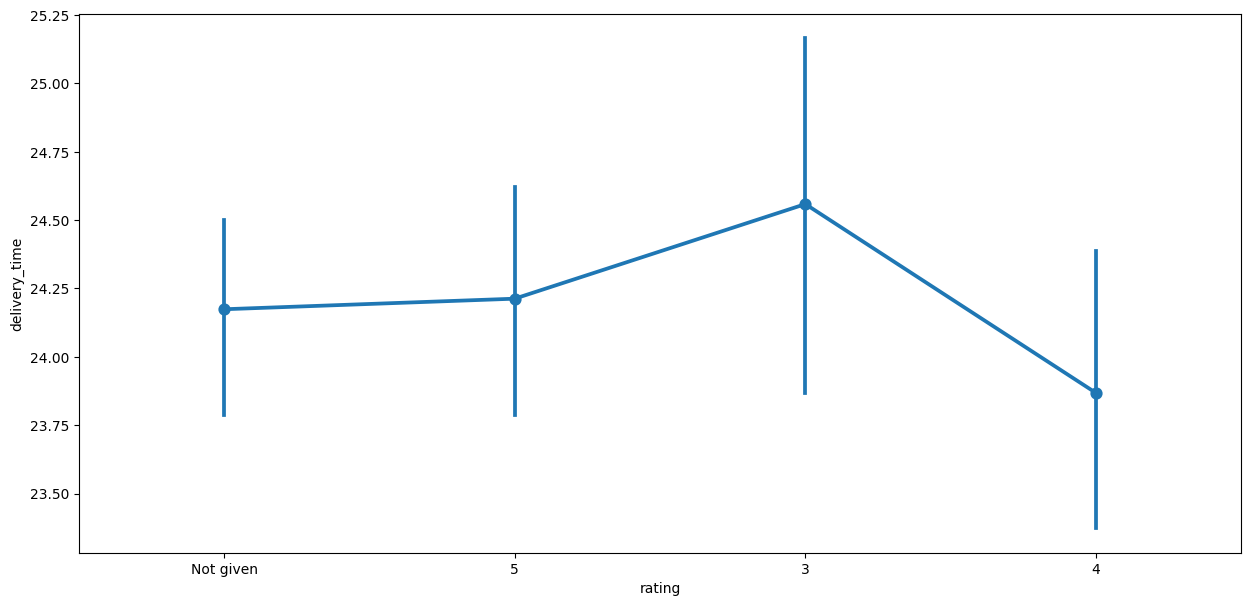

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

OBSERVATIONS: This graph indicates that the length of the delivery time of the order could a positive or negative impact on the rating; the possibility that the longer the time the order delivery takes, the lower the rating will be received is high. Interestingly, the shortest delivery time of around 23 minutes does not seem to have impacted the final rating of 4 which might indicate that other currently unknown factors may have contributed to a rating of less than 5. This graph also indicates that there are nearly the same amount and average of "not given" ratings as ratings of 5.

#### Rating vs Food preparation time

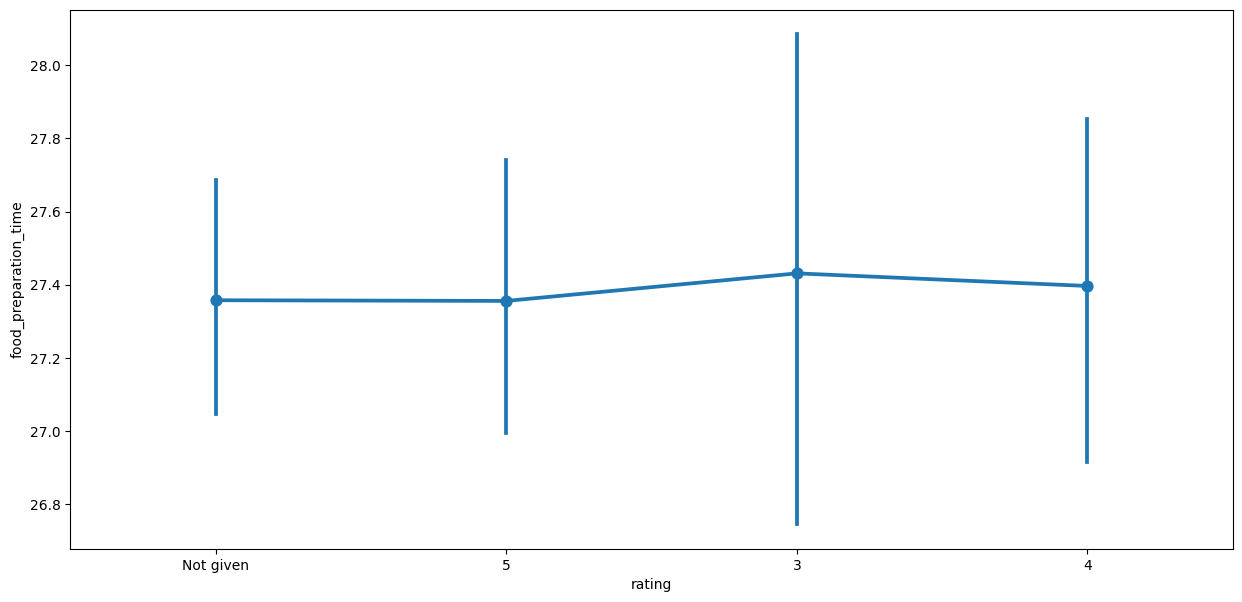

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data= df, x='rating', y='food_preparation_time')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

OBSERVATIONS: This graph does not indicate a strong correlation between the length of the food preparation time of the order and the rating. This graph demonstrates that even orders with the shortest preparation time at around 26 minutes can still receive a rating as low as 3. The minimum order time shown is around 26 minutes and the maximum order time shown is 28 minutes, both of which received a rating of 3; this is a relatively small window of time which is not necessarily discernable to the purchaser. This fact might indicate that other currently unknown factors, such as overall time of food delivery from time of order placement including delivery time may contribute to the overall rating each order receives. This graph also indicates that ratings of "Not given" and 5 have a nearly identical median preparation time of around 27.75 and ratings in the 3 column have a median preparation time of 27.45, again confirming the hypothesis that preparation time and rating have very low correlation, if any.

#### Rating vs Cost of the order

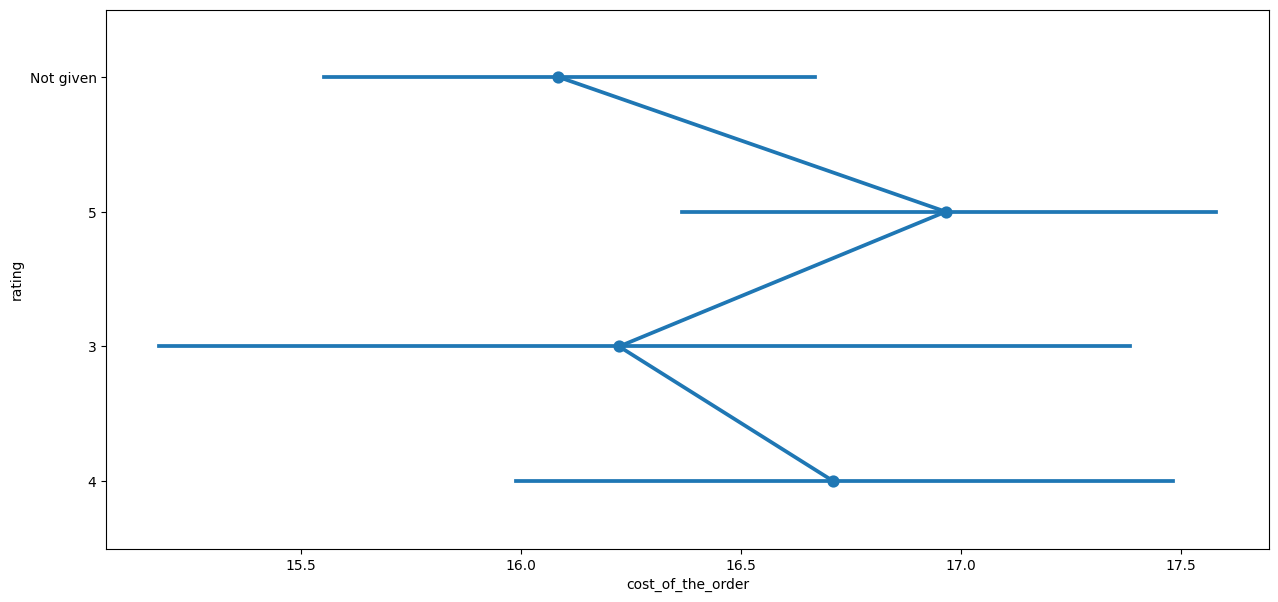

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x='cost_of_the_order', y='rating')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

OBSERVATIONS: This graph indicates that the median price for orders receiving a rating of 5 is right at 17. The median price for orders given a rating of 4 is around 16.70. It also shows that the median price for orders given a 3 rating is around 16.20 and the median price for orders receiving no rating is around 16.05. Orders with a rating of 3 can cost anywhere between around 15, the lowest cost represented on this graph, all the way up to the maximum x-tick of 17.50. This would seem to indicate that order price also has little correlation with the rating given. Also indicative of this hypothesis is the fact that the most expensive orders on this graph received a rating of 5 and that the median price of the orders not given a rating is the lowest at 16.05.

#### Correlation among variables

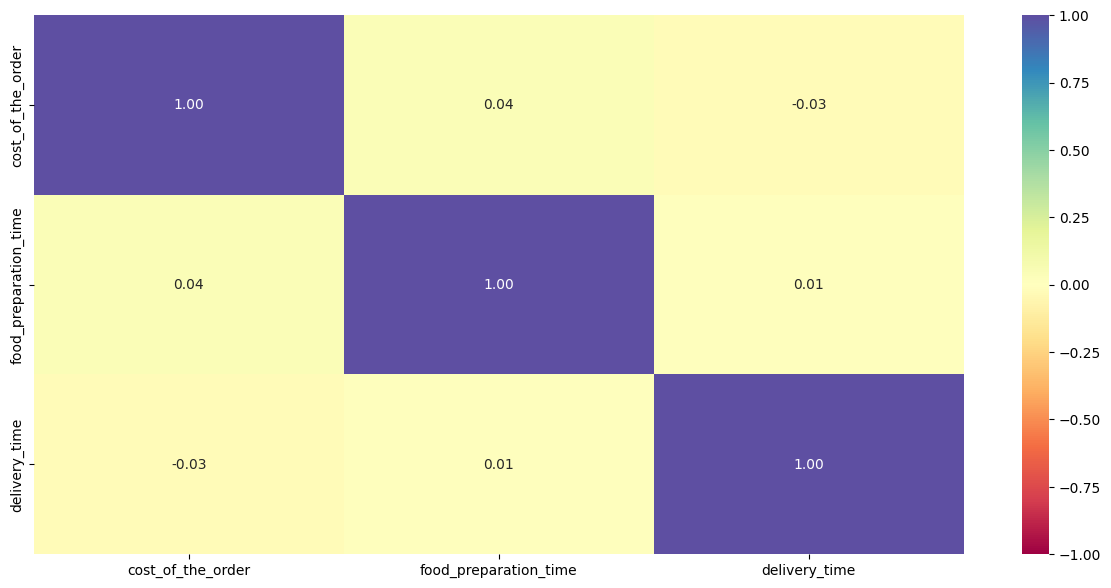

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

OBSERVATIONS: This heatmap indicates that the factors with the highest positive correlation, although very slight, at .04 is the cost of the order and the food preparation time. It also indicates that the next highest positive correlation between factors is food preparation time and delivery time at .01. Lastly, it indicates that there is a slight negative correlation between delivery time and the cost of the order at -.03.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


OBSERVATIONS: There are four restaurants that fit the requirements for the advertisement promotional offer of having a rating count of more than 50 and an average rating greater than 4. They are listed below:


1.   The Meatball Shop
2.   Blue Ribbon Fried Chicken
3. Shake Shack
4. Blue Ribbon Sushi




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


OBSERVATIONS: The net revenue generated by the company across all orders is $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

# Get orders that take longer than 60 minutes
df_time_over_60= df[df['total_time']>60] ## Write the appropriate column name to get the orders having delivery time over 60 minutes

# Calculate the number of total orders where the time is above 60 minutes
print('The number of total orders that take over 60 minutes to be delivered is:', df_time_over_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_time_over_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders over 60 minutes:", round(percentage, 2), '%')



The number of total orders that take over 60 minutes to be delivered is: 200
Percentage of orders over 60 minutes: 10.54 %


OBSERVATIONS: There are 200 orders that take over 60 minutes to be delivered, which is 10.54% of the total orders placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')





The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


OBSERVATIONS: The difference in average delivery times on weekdays vs weekends is 6 minutes; food order deliveries are expected to be delivered an average of 6 minutes faster on the weekends.

### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
The following conclusions have been derived from the observations made above:



**1.   Customer Data**
*   The company has 1898 unique order IDs and 1200 unique customer IDs.


**2.   Order Data**
*   50% of the food orders cost between 11 and 22.50, with around 550 orders falling between 11-13.
*   29.24% of orders cost more than $20.

**3. Restaurant Data**
*   There are 178 unique restaurant names and 14 unique cuisine types.
*   Shake Shack is the top restaurant with 219 orders, and Parm is the lowest among the top 5 with 68 orders.
*   The top 5 restaurants in terms of orders also lead in revenue.

**4. Cuisine Data**
*   The top 6 most commonly ordered cuisines are American, Japanese, Chinese, Italian, Mexican, and Indian.
*   American cuisine is the most common cuisine type ordered on weekends.

**5. Ratings Data**
*   The median price for orders receiving a rating of 5 is $17, with slight variations across other ratings.

**6. Delivery Data**
*   The mean order delivery time is 24 minutes, with weekend deliveries being faster by approximately 6 minutes compared to weekdays.
*   10.54% of orders take over 60 minutes to deliver, indicating room for improvement in delivery times.

### Recommendations:


**1.   Improve Delivery Efficiency**

Consider implementing strategies to reduce delivery times during weekdays to match weekend standards, aiming for consistent fast delivery. Also, explore route optimization and incentivize prompt deliveries to improve overall customer satisfaction.


**2.   Promote Top Cuisines and Restaurants**

Try to highlight American, Japanese, Chinese, Italian, Mexican, and Indian cuisines in marketing campaigns to capitalize on popular choices and feature top restaurants determined by stipulations in advertising campaign requirements in promotional materials to attract more orders.


**3. Encourage Customer Engagement**

Gather feedback on long-duration orders and take proactive steps to minimize delays, possibly offering compensation or discounts for inconvenience. Leveraging data from customer ratings and reviews can also help identify areas for improvement in service quality and order accuracy.


**4. Expand Menu Offerings and Partnerships**

Consider diversifying cuisine options further to appeal to a wider audience and establish partnerships with new restaurants to expand the variety of offerings.

**5. Data-Driven Decision Making**

Continue analyzing data trends to anticipate customer preferences and adjust business strategies accordingly. Utilize insights from correlation analysis (like cost and preparation time) to optimize operational efficiency and resource allocation. Implementing these recommendations can help FoodHub improve customer satisfaction, increase order volume, and drive realistic revenue growth.




---